In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('abc.csv') #reading aadhar data

In [4]:
df.head(10)

,Registrar,Enrolment Agency,State,District,Sub District,Pin Code,Gender,Age,Aadhaar generated,Enrolment Rejected,Residents providing email,Residents providing mobile number
0,Allahabad Bank,A-Onerealtors Pvt Ltd,Uttar Pradesh,Allahabad,Meja,212303,F,7,1,0,0,1
1,Allahabad Bank,Asha Security Guard Services,Uttar Pradesh,Sonbhadra,Robertsganj,231213,M,8,1,0,0,0
2,Allahabad Bank,SGS INDIA PVT LTD,Uttar Pradesh,Sultanpur,Sultanpur,227812,F,13,1,0,0,1
3,Allahabad Bank,Sri Ramraja Sarkar Lok Kalyan Trust,Uttar Pradesh,Shamli,Shamli,247775,M,6,1,0,0,1
4,Allahabad Bank,Transmoovers India,Uttar Pradesh,Gorakhpur,Sahjanwa,273001,M,8,1,0,0,1
5,Allahabad Bank,Transmoovers India,Uttar Pradesh,Varanasi,Pindra,221101,M,14,1,0,0,1
6,Allahabad Bank,Transmoovers India,Uttar Pradesh,Varanasi,Varanasi,221001,M,9,1,0,0,1
7,Allahabad Bank,Transmoovers India,Uttar Pradesh,Varanasi,Varanasi,221002,M,4,1,0,0,1
8,Allahabad Bank,Transmoovers India,Uttar Pradesh,Varanasi,Varanasi,221002,M,10,0,1,0,1
9,Allahabad Bank,Transmoovers India,Uttar Pradesh,Varanasi,Varanasi,221002,M,19,1,0,0,1


In [5]:
df.columns

Index(['Registrar', 'Enrolment Agency', 'State', 'District', 'Sub District',
       'Pin Code', 'Gender', 'Age', 'Aadhaar generated', 'Enrolment Rejected',
       'Residents providing email', 'Residents providing mobile number'],
      dtype='object')

In [6]:
df = df.rename(columns= {'Enrolment Agency':'Agency',\
               'Sub District': 'S_District',\
               'Aadhaar generated': 'Generated','Enrolment Rejected' : 'Rejected',\
                'Residents providing email':'Email','Residents providing mobile number':'Mobile'})

In [7]:
gender_mapping = {'M': 1, 'F': 0}
df['Gender'] = df['Gender'].map(gender_mapping) #applying mapping 

In [8]:
df.loc[df['Generated'] > 0, 'Generated'] = 1
df.loc[df['Rejected'] > 0, 'Rejected'] = 1
df.loc[df['Mobile'] > 0, 'Mobile'] = 1


In [9]:
df.head(5)

,Registrar,Agency,State,District,S_District,Pin Code,Gender,Age,Generated,Rejected,Email,Mobile
0,Allahabad Bank,A-Onerealtors Pvt Ltd,Uttar Pradesh,Allahabad,Meja,212303,0.0,7,1,0,0,1
1,Allahabad Bank,Asha Security Guard Services,Uttar Pradesh,Sonbhadra,Robertsganj,231213,1.0,8,1,0,0,0
2,Allahabad Bank,SGS INDIA PVT LTD,Uttar Pradesh,Sultanpur,Sultanpur,227812,0.0,13,1,0,0,1
3,Allahabad Bank,Sri Ramraja Sarkar Lok Kalyan Trust,Uttar Pradesh,Shamli,Shamli,247775,1.0,6,1,0,0,1
4,Allahabad Bank,Transmoovers India,Uttar Pradesh,Gorakhpur,Sahjanwa,273001,1.0,8,1,0,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440818 entries, 0 to 440817
Data columns (total 12 columns):
Registrar     440818 non-null object
Agency        440818 non-null object
State         440818 non-null object
District      440818 non-null object
S_District    440818 non-null object
Pin Code      440818 non-null object
Gender        440811 non-null float64
Age           440818 non-null int64
Generated     440818 non-null int64
Rejected      440818 non-null int64
Email         440818 non-null int64
Mobile        440818 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 40.4+ MB


In [11]:
df['Gender'].dropna(inplace=True)

In [12]:
df['Gender'].isna().sum()

0

In [13]:
df['Gender'] = df['Gender'].astype(int)

In [14]:
print("We have",len(df['State'].unique()),"unique States.") #uniques states
print("We have",len(df['District'].unique()), "unique Districts.")
print("We have",len(df['S_District'].unique()), "uniques Sub Districts.")
print("We have",len(df['Registrar'].unique()), "uniques Registrar.")

We have 37 unique States.
We have 664 unique Districts.
We have 5340 uniques Sub Districts.
We have 60 uniques Registrar.


### What percentage to aadhar card generated?

In [21]:
percent_of_aadhar_generated = np.round((df[df['Generated'] == 1]['Generated'].sum() / df['Generated'].count()) * 100)
percent_of_aadhar_generated                           

96.0

(-1.3166506621334886,
 1.1103166981968224,
 -1.0814293415753802,
 1.1315993834834468)

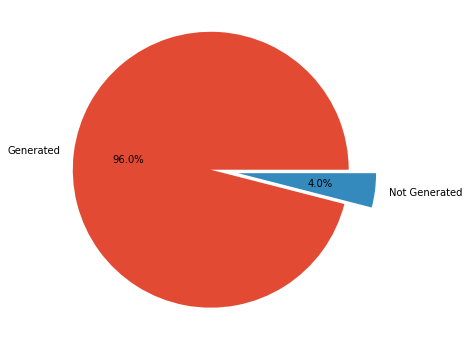

In [68]:
plt.figure(figsize=(6,6))
values = [percent_of_aadhar_generated, 100-percent_of_aadhar_generated]
labels = ['Generated', 'Not Generated']
explode=(0.2, 0.0)
plt.pie(values, autopct='%1.1f%%', explode=explode,labels=labels)
plt.axis('equal')

### What Percentage of aadhar card Rejected?

In [36]:
rejected_percent = np.round((df[df['Rejected'] == 1]['Rejected'].sum() / df['Rejected'].count())*100)
rejected_percent

7.0

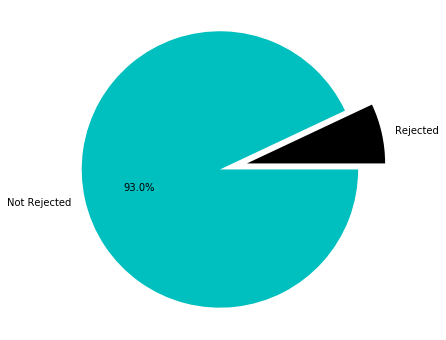

In [69]:
plt.figure(figsize=(6,6))
colors = ['black', 'c']
rej_values = [rejected_percent, 100-rejected_percent]
rej_label = ['Rejected', 'Not Rejected']
plt.pie(rej_values, labels=rej_label, explode=explode, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()

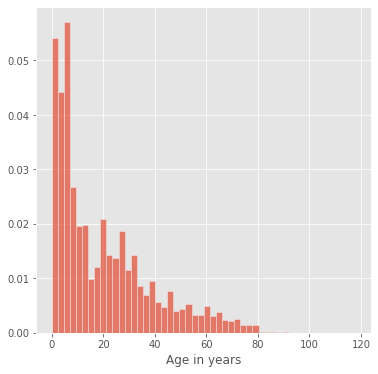

In [67]:
plt.figure(figsize=(6,6))
plt.hist(df['Age'], 50, normed=1, alpha=0.7, edgecolor = [1,1,1])
plt.xlabel("Age in years")
plt.show()

- As we can clearly see in above graph, we have more population in between of age 1-20

#### Total Male and Females

In [62]:
Male = df[df['Gender'] == 1]['Gender'].count()
Female = df[df['Gender'] == 0]['Gender'].count()

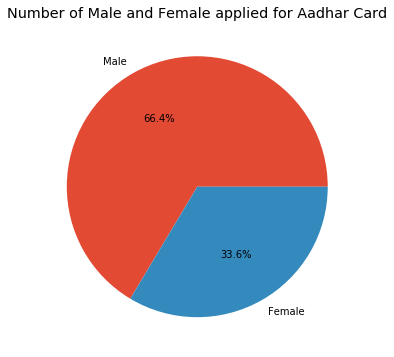

In [70]:
plt.figure(figsize=(6,6))
mf_values = [Male, Female]
mf_label = ['Male', 'Female']
plt.pie(mf_values, labels=mf_label, autopct='%1.1f%%')
plt.title("Number of Male and Female applied for Aadhar Card")
plt.show()

- As we can clearly see in the infographic above no. of females who applied for aadhar are half of the total males applied for aadhar.

#### How many people's provided Email? and How many people provided Mobile Number ?

In [100]:
email = df[df['Email'] == 1]['Email'].count()
not_provided = df[df['Email'] == 0]['Email'].count()

In [116]:
mobile = df[df['Mobile'] == 1]['Mobile'].count()
mob_not_provided = df[df['Mobile'] == 0]['Mobile'].count()

[Text(0.5, 1.0, 'Number of peoples provided Mobile Number')]

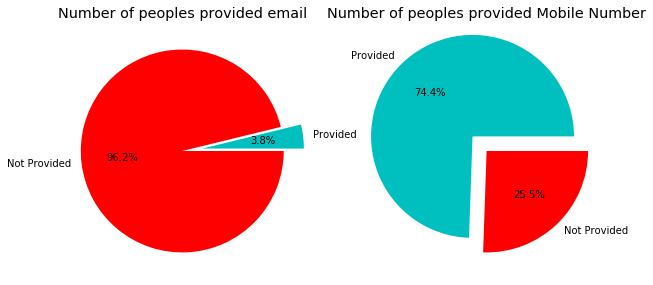

In [122]:
fig = plt.figure(figsize=(10,6))
ax1, ax2 = fig.subplots(ncols=2)

#plotting email
email_values=[email, not_provided]
email_labels = ['Provided', 'Not Provided']
colors = ['c', 'r']
ax1.pie(email_values, labels=email_labels, autopct='%1.1f%%', explode=explode, colors=colors)
plt.setp(ax1, title = ("Number of peoples provided email"))

#plotting Mobile
mob_values = [mobile, mob_not_provided]
ax2.pie(mob_values, labels=email_labels, autopct='%1.1f%%', explode=explode, colors=colors)
plt.setp(ax2, title = ("Number of peoples provided Mobile Number"))

### How much aadhar card generated per district ?

In [142]:
per_district_aadhar_generated = df[df['Generated'] == 1].groupby('District')['District'].count()

Text(0.5, 1.0, 'How much aadhar card generated per district')

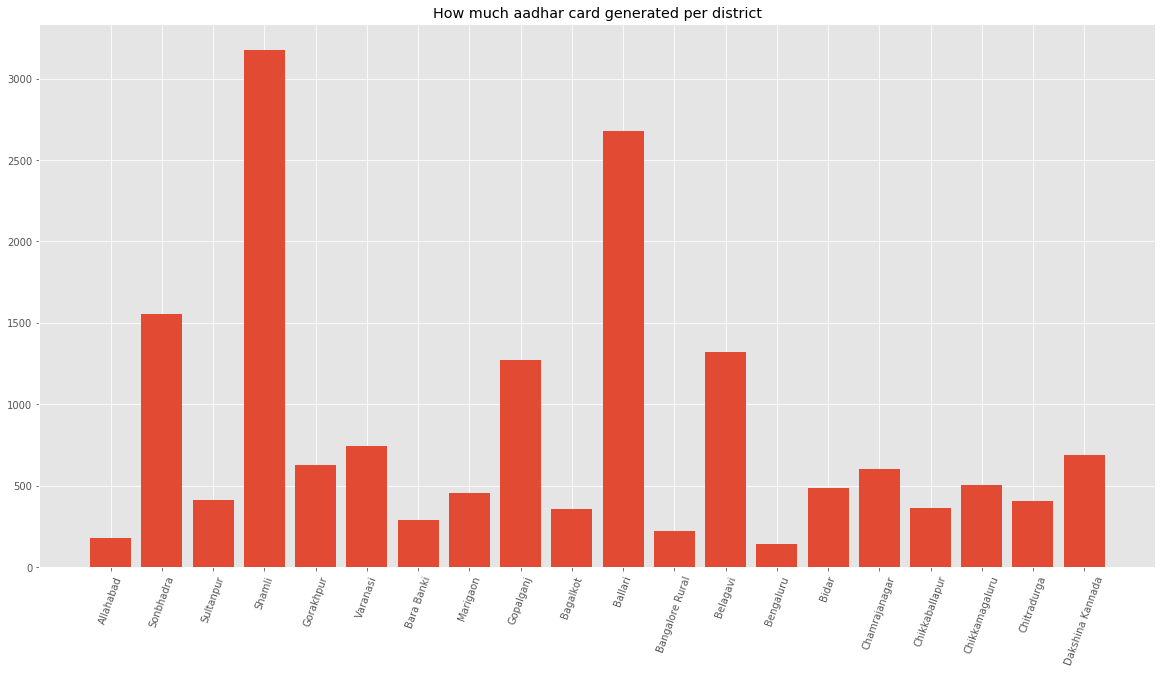

In [189]:
    plt.figure(figsize=(20,10))
    plt.bar(df['District'].unique()[:20],per_district_aadhar_generated[:20])
    plt.xticks(rotation=70)
    plt.title('How much aadhar card generated per district')

- We have total 664 districts which cannot be shown in one plot so we have choose 20 districts in the plot only.

### How much aadhar card generated by per state?

In [177]:
per_state_aadhar_card_generated = df[df['Generated'] == 1].groupby('State')['State'].count()

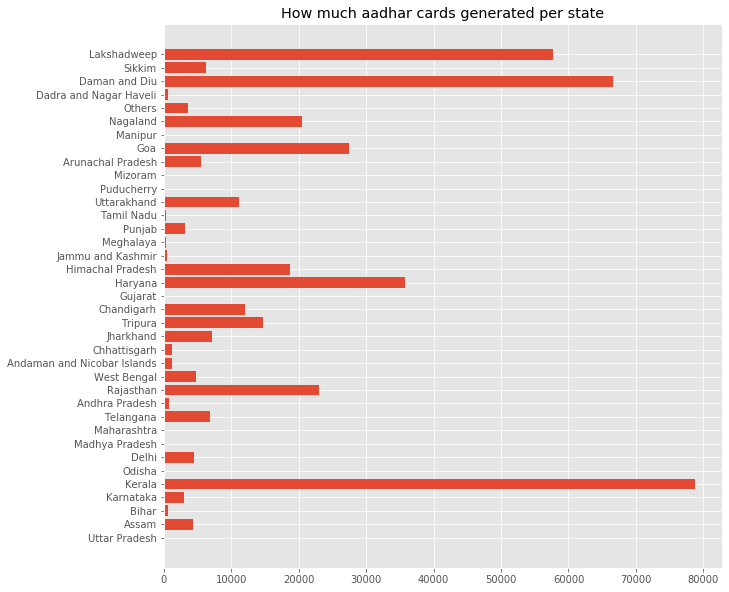

In [190]:
plt.figure(figsize=(10,10))
plt.barh(df['State'].unique(), per_state_aadhar_card_generated)
plt.title('How much aadhar cards generated per state')
plt.show()